## Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Getting datasets and reading

In [25]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path)
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
170,28,F,NORMAL,HIGH,12.879,drugX
121,15,M,HIGH,NORMAL,17.206,drugY
173,41,F,LOW,NORMAL,18.739,drugY
6,49,F,NORMAL,HIGH,16.275,drugY
68,54,M,NORMAL,HIGH,24.658,drugY


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Data Preporcessing 
* First convert the categorical variables to Numeric (Except dependent variable)

In [27]:
encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').columns.to_list()
categorical_columns.remove('Drug')
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

* Mapping dependent variable to numeric

In [28]:
custom_mapping = {'drugA': 0, 'drugB':1, 'drugC':2, 'drugX':3, 'drugY':4 }
df['Drug_num'] = df['Drug'].map(custom_mapping)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4


## Calulating the correlation and visualizing the data
* Following code calculates the correlation of each other features with the `Drug_num` and we can see that features `Na_to_K` and `BP` are highly correlated when compared with others

In [29]:
df.drop('Drug', axis=1).corr()['Drug_num']

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
Drug_num       1.000000
Name: Drug_num, dtype: float64

**Visualizing the result**

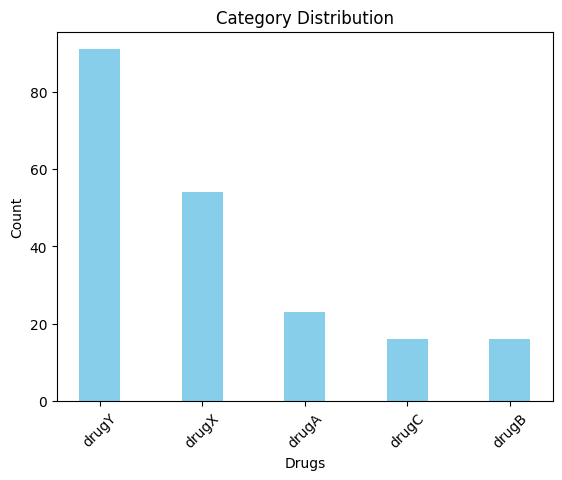

In [35]:
category_counts = df['Drug'].value_counts()
plt.bar(category_counts.index, category_counts.values, color='skyblue', width=0.4)
plt.xlabel('Drugs')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

## Model Building
* Separating the data in X and y set

In [39]:
X = df.drop(columns=['Drug', 'Drug_num'])
y = df.Drug_num

* Splitting training and testing sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Model Evaluation

In [71]:
y_pred = model.predict(X_test)
print(f'Accuracy Score: {np.round(100*metrics.accuracy_score(y_test, y_pred), 3)}%')

Accuracy Score: 100.0%


## Visualize Tree

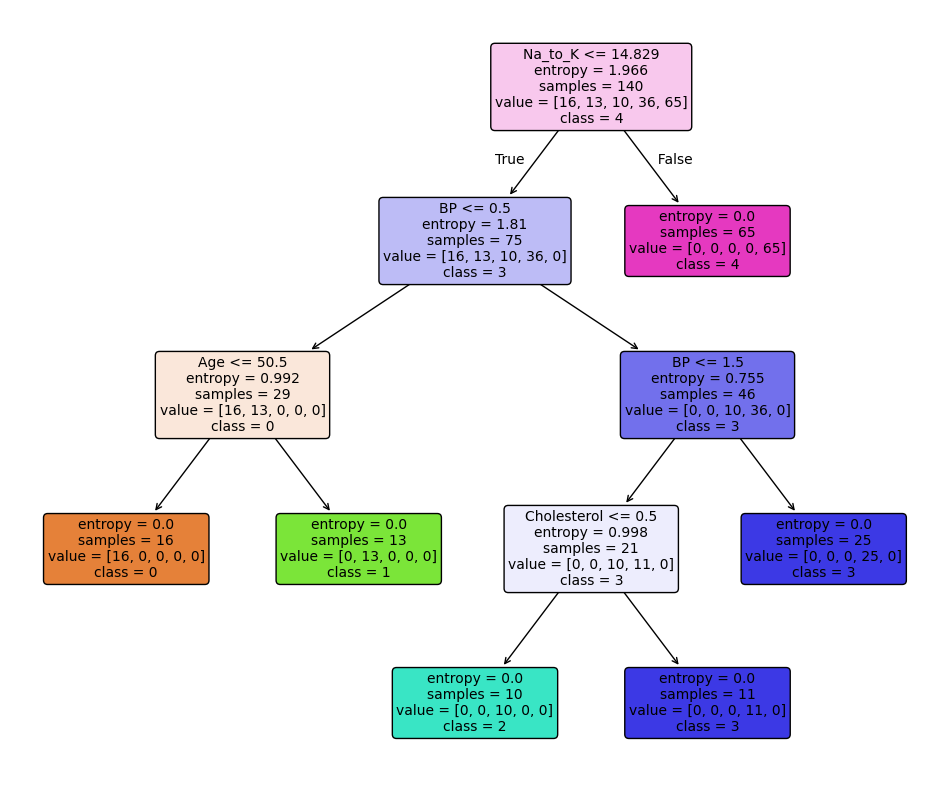

In [72]:
fig = plt.figure(figsize=(12,10))
plot_tree(model,
          feature_names=X.columns,
          class_names=[str(cls) for cls in model.classes_],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()
fig.savefig('plot_tree.jpg')